#OPDRACHT
Datasets te vinden op: https://ourworldindata.org/

Opdracht: Formuleer een antwoord op de volgende vraag in je rapport.


- Wat is de grootste voorspeller van een grote CO2-emissie per hoofd van de bevolking van een land?



- Grootste voorspeller van CO2-emissie:

Om dit te bepalen kunt u rekening houden met zaken als het BNP per hoofd van de bevolking, diëten, het aantal auto's per hoofd van de bevolking, verschillende energiebronnen, mobiliteit en andere factoren.

Uw antwoord kan ook een specifieke combinatie van bepaalde factoren zijn.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

De volgende datasets kijken naar het verschil in CO2 emissies voor elk land over de jaren heen. In het codebook staat de betekenis van de kolommen.

df_diet bevat het verschil in consumptie per voedselgroep over de jaren heen per hoofd vd bevolking in een land.

In [2]:
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-codebook.csv'
df_co2_codebook = pd.read_csv(url)

# https://ourworldindata.org/co2-and-greenhouse-gas-emissions
url = 'https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv'
df_co2 = pd.read_csv(url)

#https://ourworldindata.org/grapher/dietary-compositions-by-commodity-group
url = 'https://raw.githubusercontent.com/MBonnes/LocalGitDAP/main/CO2%20Emissions/dietary-compositions-by-commodity-group.csv'
df_diet = pd.read_csv(url)

In [3]:
url = 'https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv'
df_energy = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/MBonnes/LocalGitDAP/main/CO2%20Emissions/transport-sector-co2-emissions-by-mode-in-the-sustainable-development-scenario-2000-2030.csv'
df_transport = pd.read_csv(url,sep=',')

In [4]:
df_co2_codebook

,column,description,source
0,country,Geographic location.,Our World in Data
1,year,Year of observation.,Our World in Data
2,iso_code,"ISO 3166-1 alpha-3, three-letter country codes.",International Organization for Standardization
3,population,Population of each country or region.,Our World in Data based on different sources (...
4,gdp,Gross domestic product measured in internation...,Maddison Project Database 2020 (Bolt and van Z...
...,...,...,...
69,share_global_other_co2,Annual production-based emissions of carbon di...,Our World in Data based on the Global Carbon P...
70,total_ghg,Total greenhouse gas emissions including land-...,Our World in Data based on Climate Analysis In...
71,total_ghg_excluding_lucf,Total greenhouse gas emissions excluding land-...,Our World in Data based on Climate Analysis In...
72,trade_co2,Annual net carbon dioxide (CO₂) emissions embe...,Our World in Data based on the Global Carbon P...


In [ ]:
df_co2

In deze tabel kunnen we al kijken naar de jaarlijkse ontwikkelingen van co2 per land per gdp, energie, coal, consumption etc. We verwijderen kolommen waar we niks mee gaan doen.

In [5]:
df_co2_small = df_co2.drop(columns = ['iso_code', 'cement_co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs','co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy','co2_per_gdp', 'co2_per_unit_energy', 'coal_co2','consumption_co2', 
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2','cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2','cumulative_oil_co2', 'cumulative_other_co2',
       'energy_per_gdp', 'gas_co2','ghg_excluding_lucf_per_capita','land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'nitrous_oxide','oil_co2', 'other_co2_per_capita','other_industry_co2', 'primary_energy_consumption',
       'share_global_cement_co2', 'share_global_co2','share_global_co2_including_luc', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2','share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2','share_global_cumulative_flaring_co2','share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2','share_global_luc_co2', 'share_global_oil_co2', 'ghg_per_capita',
       'share_global_other_co2', 'total_ghg', 'total_ghg_excluding_lucf','trade_co2', 'trade_co2_share'])

In [ ]:
df_co2_small

In [ ]:
#Alle landen in de lijst
countries = df_co2_small['country'].unique()
countries

In [7]:
#CHECK UNIEKE WAARDEN
def unieke_waarden_per_kolom(df,col):
  print(f'----{col}----')
  display(df.loc[:,col].unique())
  num_unique_values = len(df.loc[:,col].unique())
  if num_unique_values == len(df.loc[:,col]):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  else:
    print(f"Aantal unieke waarden: {num_unique_values}, per {len(df.loc[:,col])} rijen")

In [8]:
#SORTEER EN KIJK NAAR DE RANDGEVALLEN
def look_at_edges(df,col):
  # inner function
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  print(f"----{col}----")
  column = df[col]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unieke waarden gesorteerd, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      print(f"Kan waarden niet sorteren: {error}")
      print("..dus laten we de NULL waarden proberen te filterenen dan sorteren")
      non_null_uniques = df.loc[~df[col].isnull(), col].unique()
      sorted = np.sort(non_null_uniques)
      show_head_and_tail(sorted)

In [9]:
#CAST NAAR TYPE
def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


In [ ]:
#we kijken naar de gdp waarden tov de co2
#eerst deze kolommen analyseren
for col in ['co2','gdp']:
  unieke_waarden_per_kolom(df_co2_small,col)
  look_at_edges(df_co2_small,col)

#in beide kolommen zitten nan waarden
#en co2 heeft ook 0.0 waarden

#FREQUENTIE CHECK
for col in ['co2','gdp']:
  display(df_co2_small[col].value_counts(dropna=False))

# co2:
# NaN         15174
# 0.000        4757

# gdp:
# NaN             31972

In [11]:
# Laten we eens kijken naar de data waar co2 = 0
df_co2_small[df_co2_small['co2']==0.000]
#alle andere kolommen zijn hier ook 0.0 of nan, we gaan deze verwijderen uit onze dataset
df_co2_small = df_co2_small[~(df_co2_small['co2']==0.000)]

In [12]:
# Laten we eens kijken naar de data waar co2 is nan
df_co2_small[df_co2_small['co2'].isna()]
#alle andere kolommen zijn hier ook nan, we gaan deze verwijderen uit onze dataset
df_co2_small = df_co2_small[~(df_co2_small['co2'].isna())]
#ook voor co2_per capita

#BNP

In [13]:
# gdp heeft nog steeds nan waarden
df_co2_small[df_co2_small['gdp'].isna()]
# voor de vergelijking co2 tov gdp gaan we deze rijen ook buiten beschouwing laten
df_co2_small_gdp = df_co2_small[~(df_co2_small['gdp'].isna())]

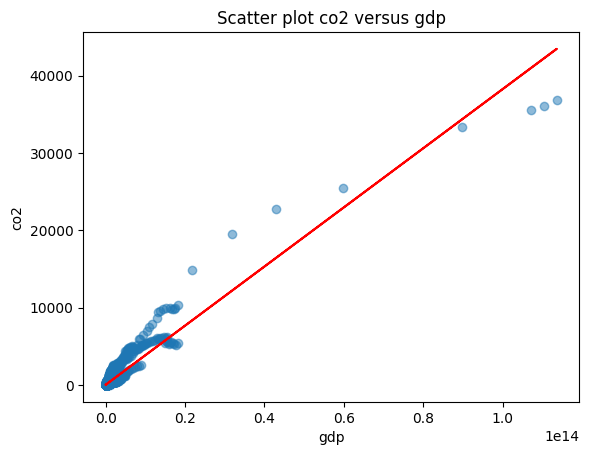

In [14]:
#we kijken naar de gdp waarden tov de co2
from scipy import stats

#Scatter chart co2 - gdp + lineaire regressielijn
fig, ax = plt.subplots()
x = df_co2_small_gdp['gdp']
y = df_co2_small_gdp['co2']
ax.set_xlabel('gdp')
ax.set_ylabel("co2")
ax.set_title('Scatter plot co2 versus gdp')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

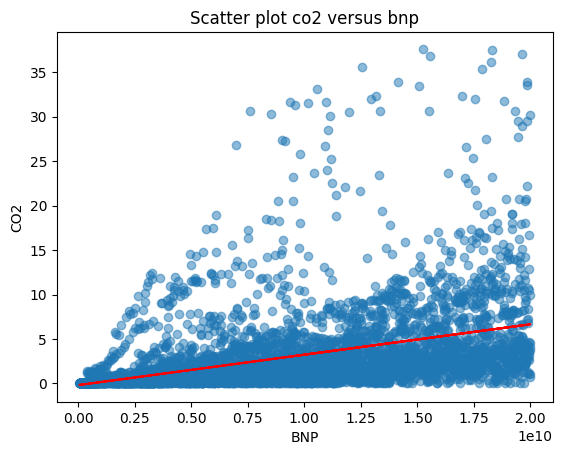

In [15]:
# we willen de extreme waarden niet meenemen
#we kijken naar de gdp waarden tov de co2
from scipy import stats

#Scatter chart co2 - gdp + lineaire regressielijn
df_co2_small_gdp_tmp = df_co2_small_gdp[df_co2_small_gdp['gdp'] <= 2.0e+10]
df_co2_small_gdp_tmp = df_co2_small_gdp_tmp[df_co2_small_gdp_tmp['co2'] <= 200]
fig, ax = plt.subplots()
x = df_co2_small_gdp_tmp['gdp']
y = df_co2_small_gdp_tmp['co2']
ax.set_xlabel('BNP')
ax.set_ylabel("CO2")
ax.set_title('Scatter plot co2 versus bnp')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

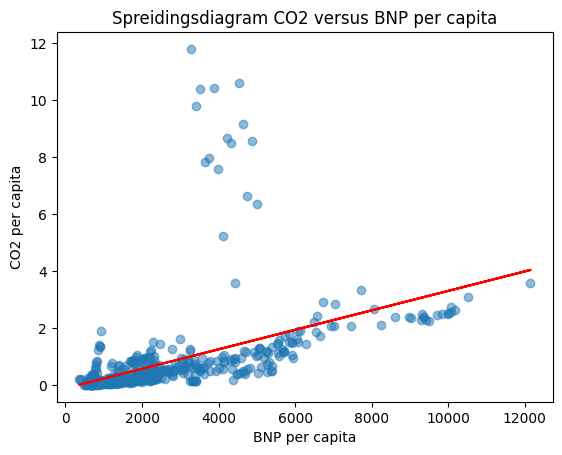

In [16]:
#we kijken naar de gdp waarden tov de co2 per capita
from scipy import stats

#Scatter chart gini - gdp + lineaire regressielijn
df_co2_small_gdp_tmp = df_co2_small_gdp[df_co2_small_gdp['gdp'] <= 1.0e+9] #2.0e+10
df_co2_small_gdp_tmp = df_co2_small_gdp_tmp[df_co2_small_gdp_tmp['co2'] <= 200]
fig, ax = plt.subplots()
x = df_co2_small_gdp_tmp['gdp']/df_co2_small_gdp_tmp['population']
y = df_co2_small_gdp_tmp['co2_per_capita']
ax.set_xlabel('BNP per capita')
ax.set_ylabel("CO2 per capita")
ax.set_title('Spreidingsdiagram CO2 versus BNP per capita')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

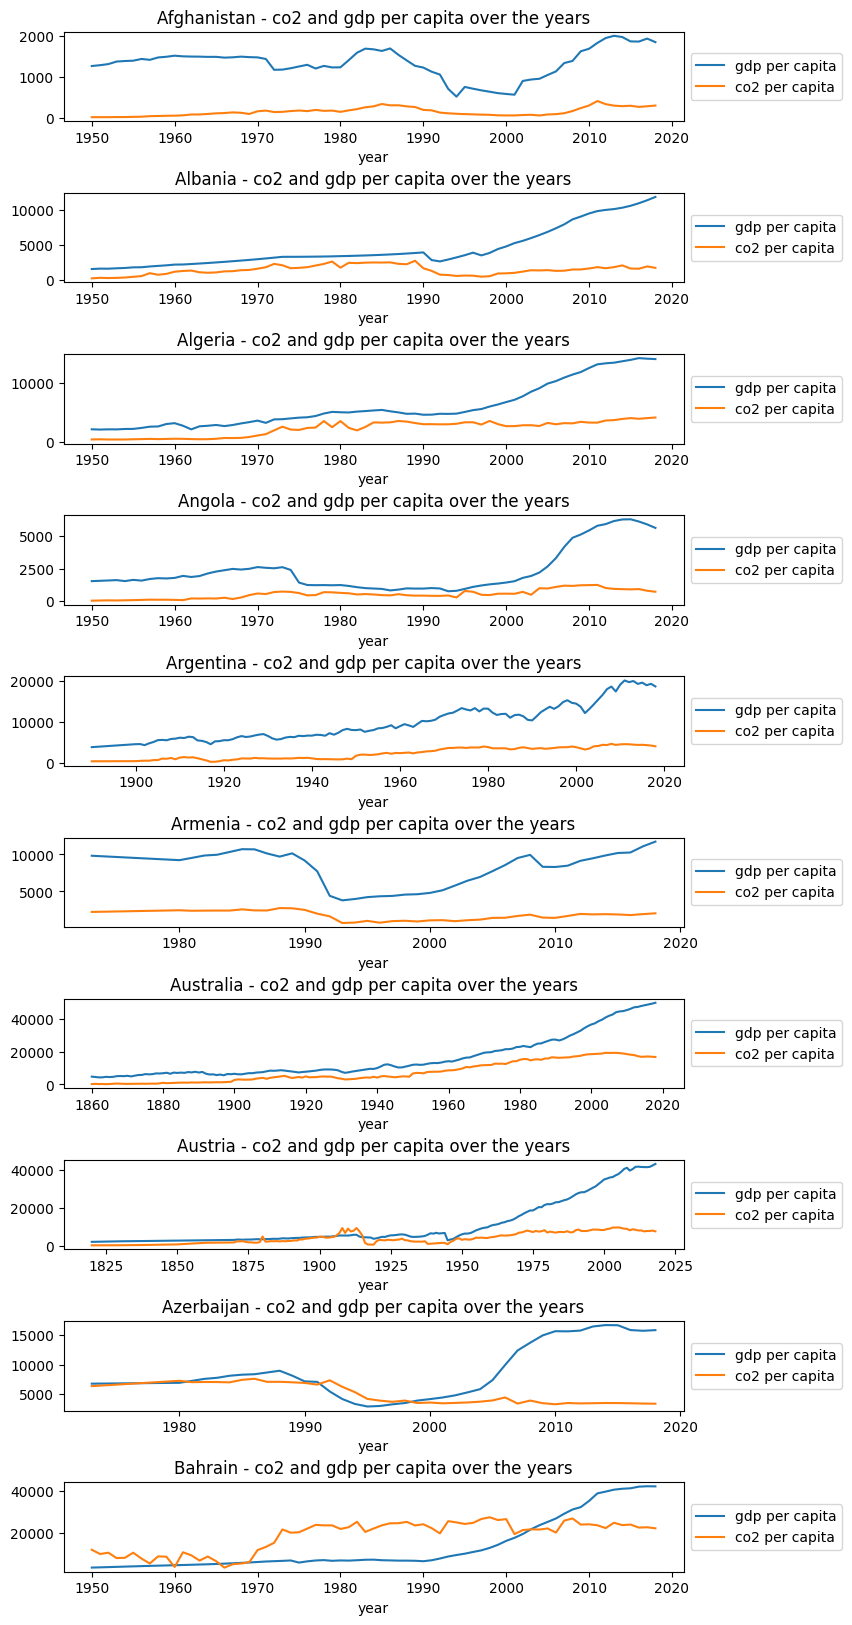

In [17]:
#laten we nu eens over de jaren heen de gdp plotten en de co2

#Lineplot per land (10 stuks)
fig, ax = plt.subplots(10)
fig.set_size_inches(8,20)
plt.subplots_adjust( hspace=.8)
i = 0
for country in countries:
  temp = df_co2_small_gdp[df_co2_small_gdp['country'] == country]
  if i < 10 and len(temp['year']) > 12:
    x = temp['year']
    y1 = temp['gdp']/temp['population']
    y2 = temp['co2_per_capita']*1000 #om verschil goed te zien
    ax[i].set_xlabel('year')
    ax[i].set_title(country + ' - co2 and gdp per capita over the years')
    ax[i].plot(x, y1, label = 'gdp per capita')
    ax[i].plot(x, y2, label = 'co2 per capita')
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i = i + 1


In [18]:
country_group = df_co2_small_gdp.groupby(['country'])
country_group_mean = country_group['co2_per_capita'].mean().sort_values(ascending=False)
country_group_mean = pd.DataFrame({'country':country_group_mean.index, 'mean':country_group_mean.values})
country_group_mean_largest = country_group_mean.nlargest(10,'mean')
country_group_mean_largest

,country,mean
0,Qatar,45.801797
1,Kuwait,29.898791
2,United Arab Emirates,29.014948
3,Luxembourg,28.151899
4,Bahrain,18.265159
5,Estonia,16.490200
6,Trinidad and Tobago,14.814884
7,Czechia,14.225673
8,Kazakhstan,13.957750
9,Russia,12.081661


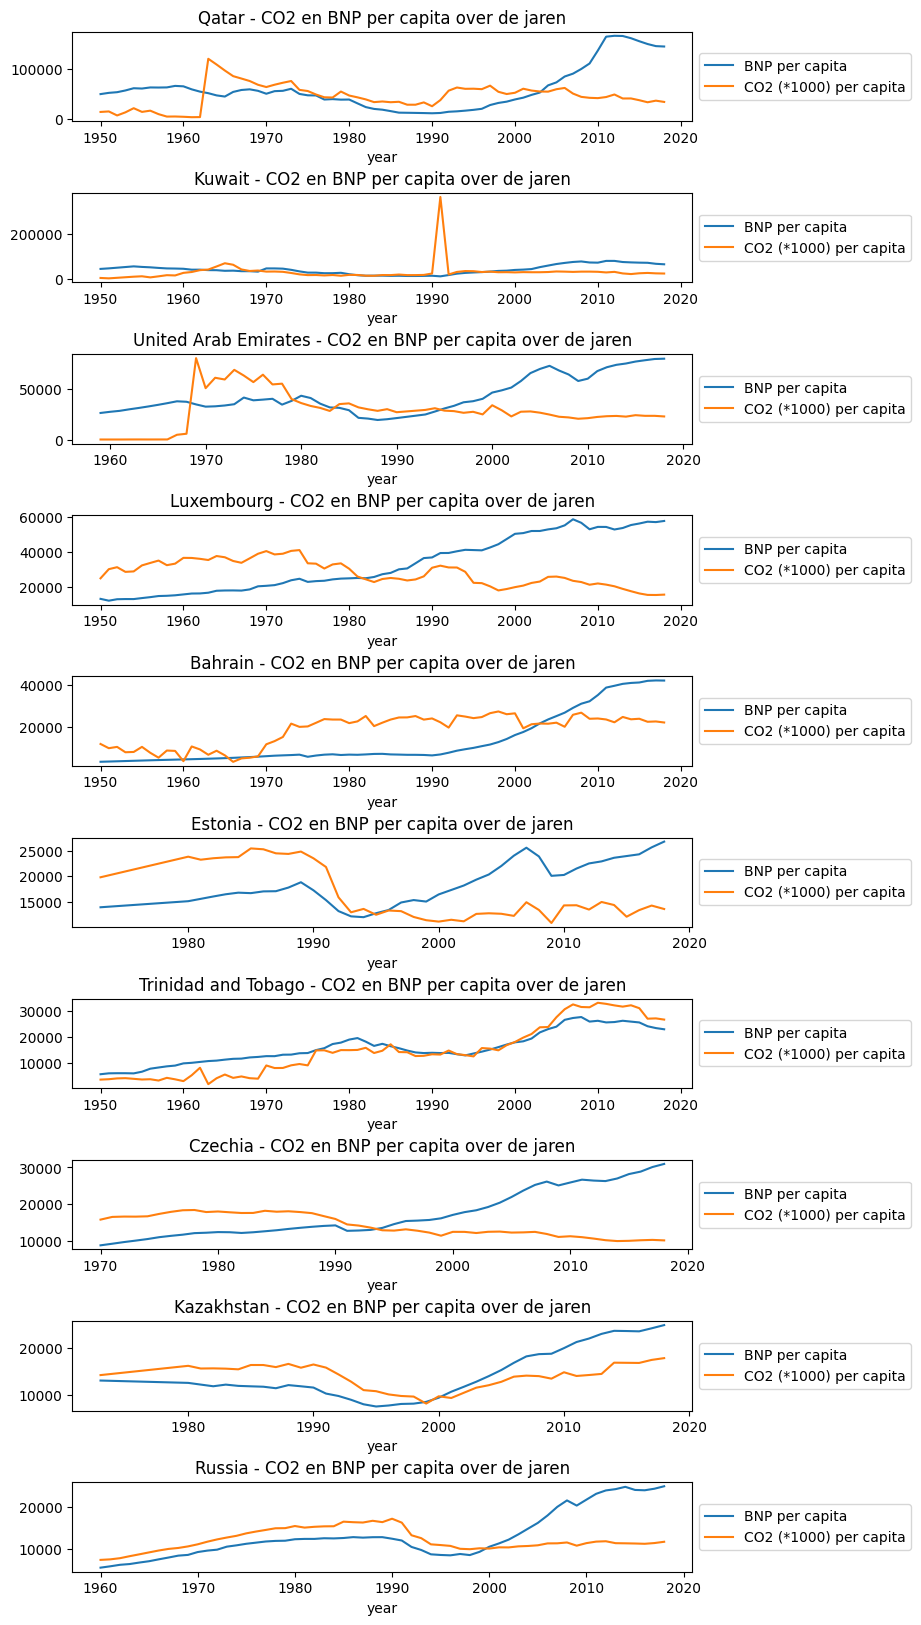

In [19]:
#laten we nu eens over de jaren heen de gdp plotten en de co2

#Lineplot per land, maar nu degenen met de gemiddelde, hoogste co2 emissies per capita (10 stuks)
fig, ax = plt.subplots(10)
fig.set_size_inches(8,20)
plt.subplots_adjust( hspace=.8)
i = 0
for country in country_group_mean_largest['country']:
  temp = df_co2_small_gdp[df_co2_small_gdp['country'] == country]
  if i < 10 and len(temp['year']) > 12:
    x = temp['year']
    y1 = temp['gdp']/temp['population']
    y2 = temp['co2_per_capita']*1000 #om verschil goed te zien
    ax[i].set_xlabel('year')
    ax[i].set_title(country + ' - CO2 en BNP per capita over de jaren')
    ax[i].plot(x, y1, label = 'BNP per capita')
    ax[i].plot(x, y2, label = 'CO2 (*1000) per capita')
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i = i + 1

Een echte trend is hierin niet te ontdekken. Laten we eens kijken naar de correlatiecoeffient. Over de wereld en per land.

In [20]:
# Correlatie coefficient berekene, per capita
df_co2_small_gdp['gdp_per_capita'] = df_co2_small_gdp['gdp']/df_co2_small_gdp['population']
x = df_co2_small_gdp['gdp_per_capita']
y = df_co2_small_gdp['co2_per_capita']
r = np.corrcoef(x, y)
display(r)

<ipython-input-20-18c37a68a849>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2_small_gdp['gdp_per_capita'] = df_co2_small_gdp['gdp']/df_co2_small_gdp['population']


array([[1.       , 0.6018162],
       [0.6018162, 1.       ]])

In [ ]:
df_co2_small_gdp['country'].unique()

,corrcoef
Czechia,-0.845851
Luxembourg,-0.777588
Slovakia,-0.752498
Malawi,-0.499804
Niger,-0.397506
...,...
Brazil,0.988092
South Korea,0.988520
Saint Lucia,0.989018
Turkey,0.989633


<Axes: >

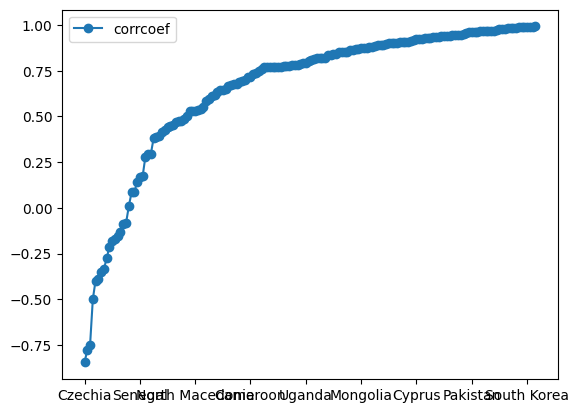

In [21]:
#Is dit per land verschillend?
coef_dic = {}
#alleen landen met minimaal 25 datapunten om een goed beeld te krijgen
for country in df_co2_small_gdp['country']:
  if len(df_co2_small_gdp[df_co2_small_gdp['country'] == country]) >= 25:
    x = df_co2_small_gdp[df_co2_small_gdp['country'] == country]['gdp_per_capita']
    y = df_co2_small_gdp[df_co2_small_gdp['country'] == country]['co2_per_capita']
    r = np.corrcoef(x, y)
    coef_dic[country] = r[0][1]

#verwijder nan (opgetreden als er binnen één lijst geen verschil in de data zit)
import math
coef_dic = {key: value for (key, value) in coef_dic.items() if not math.isnan(value)}

# display(coef_dic)

#dan eerst een dataframe van maken:
coef_df = pd.DataFrame.from_dict(coef_dic,orient='index',columns=['corrcoef'])
#en sorteren
coef_df.sort_values(by=['corrcoef'],inplace=True)
display(coef_df)
coef_df.plot(marker='o')

Laten we kijken naar eetpatronen

In [22]:
df_co2_small.columns

Index(['country', 'year', 'population', 'gdp', 'cement_co2_per_capita', 'co2',
       'co2_per_capita', 'coal_co2_per_capita', 'consumption_co2_per_capita',
       'energy_per_capita', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2_per_capita', 'methane_per_capita', 'nitrous_oxide_per_capita',
       'oil_co2_per_capita'],
      dtype='object')

#VOEDSEL

In [ ]:
#Combineer co2 dataset met diet dataset
df_diet.rename(columns={'Entity' : 'country', 'Year' : 'year'},inplace=True)
df_co2_and_diet = pd.merge(df_co2_small.loc[:,['country', 'year','co2_per_capita']],df_diet, on = ['country','year'])
df_co2_and_diet

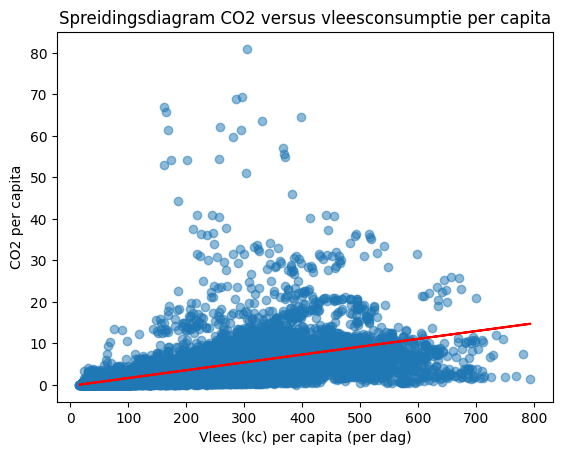

In [24]:
#we kijken naar 'Meat'

#we kijken naar de meat kc waarden tov de co2 per capita
from scipy import stats

#Scatter chart gini - gdp + lineaire regressielijn
temp = df_co2_and_diet[df_co2_and_diet['co2_per_capita'] <= 150] #outliers eruit
fig, ax = plt.subplots()
x = temp['Meat (FAO (2017)) (kilocalories per person per day)']
y = temp['co2_per_capita']
ax.set_xlabel('Vlees (kc) per capita (per dag)')
ax.set_ylabel("CO2 per capita")
ax.set_title('Spreidingsdiagram CO2 versus vleesconsumptie per capita')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

In [25]:
# Correlatie coefficient berekenen, per capita
x = df_co2_and_diet['Meat (FAO (2017)) (kilocalories per person per day)']
y = df_co2_and_diet['co2_per_capita']
r = np.corrcoef(x, y)
display(r)

array([[1.        , 0.40897028],
       [0.40897028, 1.        ]])

In [26]:
# Correlatie coefficient berekenen, per capita
x = df_co2_and_diet['Dairy & Eggs (FAO (2017)) (kilocalories per person per day)']
y = df_co2_and_diet['co2_per_capita']
r = np.corrcoef(x, y)
display(r)

array([[1.        , 0.41474171],
       [0.41474171, 1.        ]])

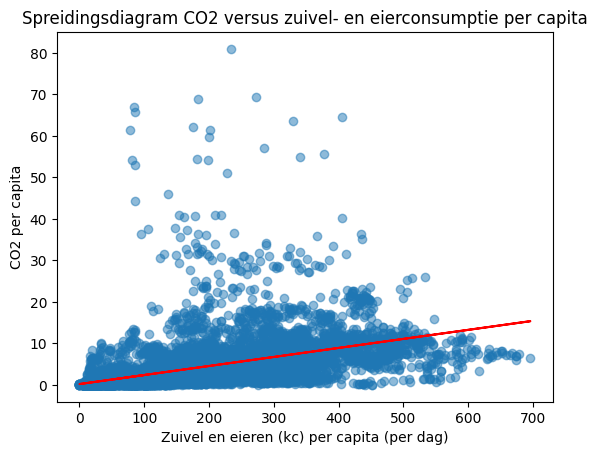

In [27]:
#we kijken naar de zuivel en eieren kc waarden tov de co2 per capita
from scipy import stats

#Scatter chart lineaire regressielijn
temp = df_co2_and_diet[df_co2_and_diet['co2_per_capita'] <= 150] #outliers eruit
fig, ax = plt.subplots()
x = temp['Dairy & Eggs (FAO (2017)) (kilocalories per person per day)']
y = temp['co2_per_capita']
ax.set_xlabel('Zuivel en eieren (kc) per capita (per dag)')
ax.set_ylabel("CO2 per capita")
ax.set_title('Spreidingsdiagram CO2 versus zuivel- en eierconsumptie per capita')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

In [28]:
df_co2_and_diet.columns = ['country', 'year', 'co2_per_capita', 'Code', 'Other','Alcohol','Sugar','Oils & Fats','Meat','Dairy & Eggs','Fruit & Vegetables', 'Starchy Roots','Pulses','Cereals & Grains']

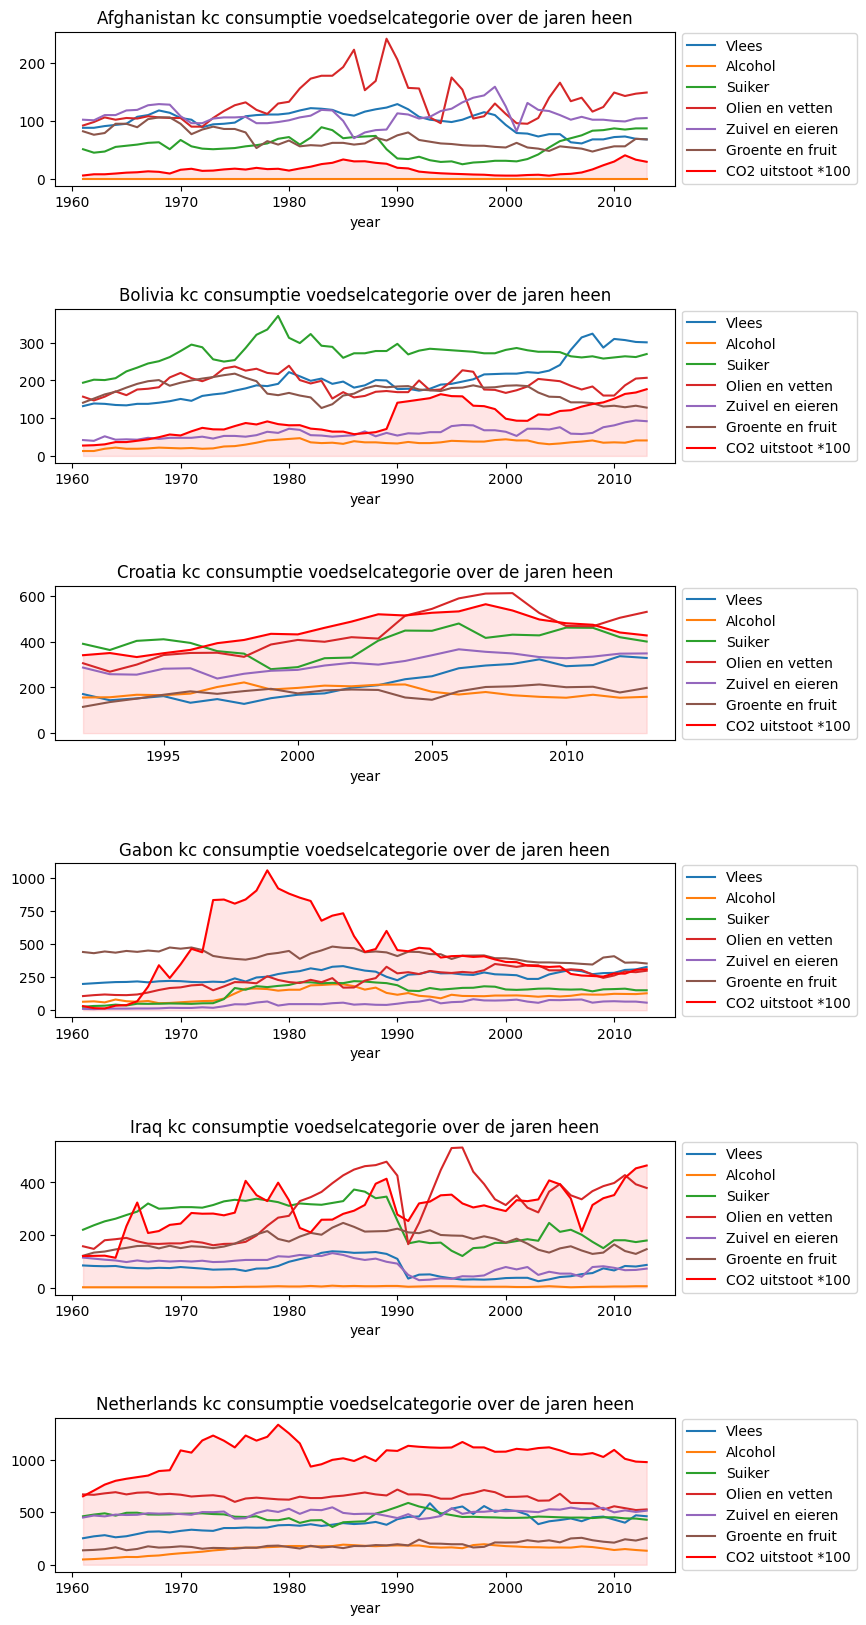

In [29]:
#Lineplot per land, maar nu degenen met de gemiddelde, hoogste co2 emissies per capita (10 stuks) - GEEN GRAAN
fig, ax = plt.subplots(6)
fig.set_size_inches(8,20)
plt.subplots_adjust( hspace=.8)
i=0
z = 0
for country in df_co2_and_diet['country'].unique():
  temp = df_co2_and_diet[df_co2_and_diet['country'] == country]
  if z%18==0 and len(temp['year']) > 20 and i < 6:
    x = temp['year']
    y1 = temp['Meat']
    y2 = temp['Alcohol']
    y3 = temp['Sugar']
    y4 = temp['Oils & Fats']
    y5 = temp['Dairy & Eggs']
    y6 = temp['Fruit & Vegetables']
    y7 = temp['Cereals & Grains']
    ax[i].set_xlabel('year')
    ax[i].set_title(country + ' kc consumptie voedselcategorie over de jaren heen')
    ax[i].plot(x, y1, label = 'Vlees')
    ax[i].plot(x, y2, label = 'Alcohol')
    ax[i].plot(x, y3, label = 'Suiker')
    ax[i].plot(x, y4, label = 'Olien en vetten')
    ax[i].plot(x, y5, label = 'Zuivel en eieren')
    ax[i].plot(x, y6, label = 'Groente en fruit')
    # ax[i].plot(x, y7, label = 'Granen')
    ax[i].plot(x,temp['co2_per_capita']*100,c='r',label='CO2 uitstoot *100')
    ax[i].fill_between(x, temp['co2_per_capita']*100,color='red',alpha=0.1)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i=i+1
  z = z + 1

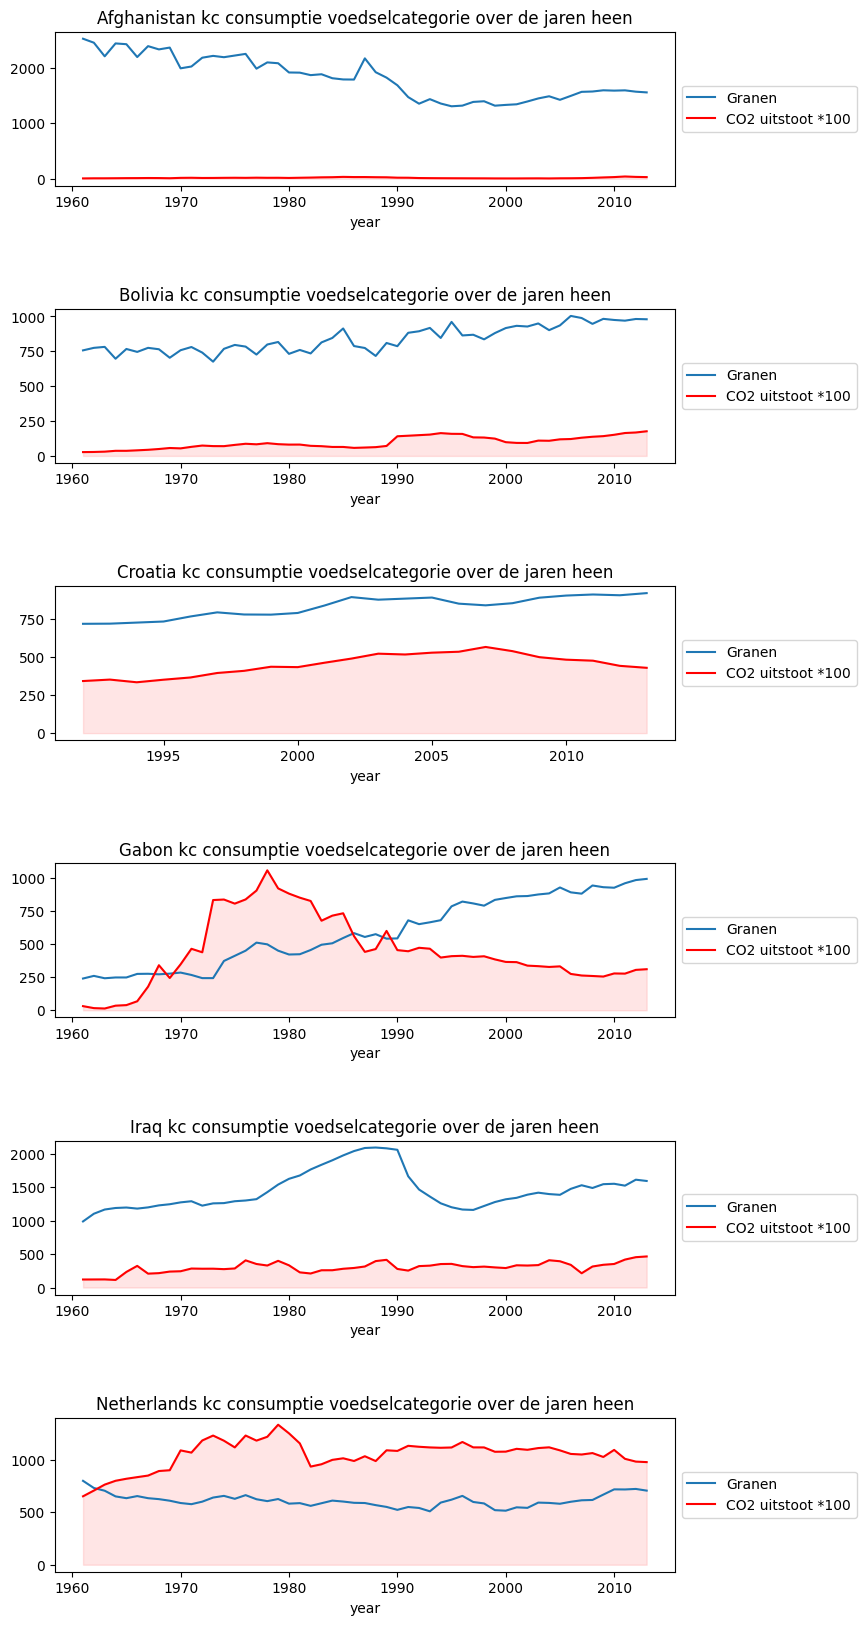

In [30]:
#Lineplot per land, maar nu degenen met de gemiddelde, hoogste co2 emissies per capita (10 stuks)  :  GRAAN
fig, ax = plt.subplots(6)
fig.set_size_inches(8,20)
plt.subplots_adjust( hspace=.8)
i=0
z = 0
for country in df_co2_and_diet['country'].unique():
  temp = df_co2_and_diet[df_co2_and_diet['country'] == country]
  if z%18==0 and len(temp['year']) > 20 and i < 6:
    x = temp['year']
    y7 = temp['Cereals & Grains']
    ax[i].set_xlabel('year')
    ax[i].set_title(country + ' kc consumptie voedselcategorie over de jaren heen')
    ax[i].plot(x, y7, label = 'Granen')
    ax[i].plot(x,temp['co2_per_capita']*100,c='r',label='CO2 uitstoot *100')
    ax[i].fill_between(x, temp['co2_per_capita']*100,color='red',alpha=0.1)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i=i+1
  z = z + 1

#ENERGIEBRONNEN
Tradiotionele energiebronnen bekijken
Steenkool
Aardgas
Aardolie

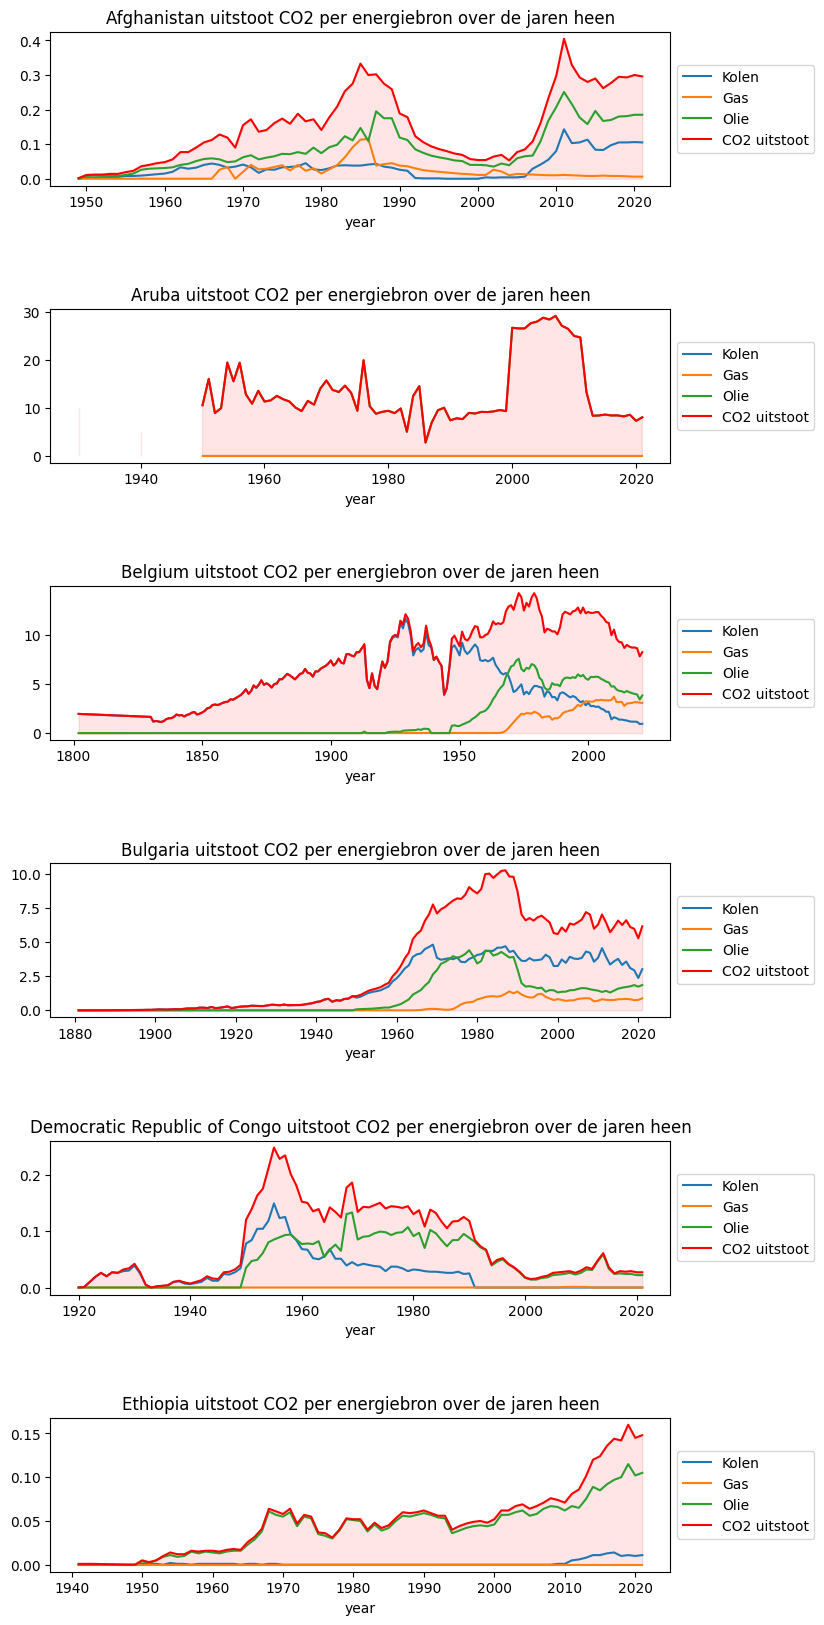

In [31]:
#Lineplots per land
fig, ax = plt.subplots(6)
fig.set_size_inches(8,20)
plt.subplots_adjust( hspace=.8)
i=0
z = 0
for country in df_co2_small['country'].unique():
  temp = df_co2_small[df_co2_small['country'] == country]
  if z%12==0 and len(temp['year']) > 20 and i < 6:   #z%12 aanpassen voor 'willekeurige' andere landen
    x = temp['year']
    y1 = temp['coal_co2_per_capita']
    y2 = temp['gas_co2_per_capita']
    y3 = temp['oil_co2_per_capita']
    y4 = temp['co2_per_capita']
    ax[i].set_xlabel('year')
    ax[i].set_title(country + ' uitstoot CO2 per energiebron over de jaren heen')
    ax[i].plot(x, y1, label = 'Kolen')
    ax[i].plot(x, y2, label = 'Gas')
    ax[i].plot(x, y3, label = 'Olie')
    ax[i].plot(x, y4,c='r',label='CO2 uitstoot')
    ax[i].fill_between(x, y4,color='red',alpha=0.1)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i=i+1
  z = z + 1

In [32]:
# Correlatie coefficient berekenen, per capita
#NaN waarde verwijderen om mee te rekenen
y1 = df_co2_small[~df_co2_small['coal_co2_per_capita'].isna()]
y2 = df_co2_small[~df_co2_small['gas_co2_per_capita'].isna()]
y3 = df_co2_small[~df_co2_small['oil_co2_per_capita'].isna()]
print('Kolen')
r = np.corrcoef(y1['co2_per_capita'], y1['coal_co2_per_capita'])
display(r)
print('Gas')
r = np.corrcoef(y2['co2_per_capita'], y2['gas_co2_per_capita'])
display(r)
print('Olie')
r = np.corrcoef(y3['co2_per_capita'], y3['oil_co2_per_capita'])
display(r)

Kolen


array([[1.        , 0.14744765],
       [0.14744765, 1.        ]])

Gas


array([[1.        , 0.22869294],
       [0.22869294, 1.        ]])

Olie


array([[1.        , 0.96313799],
       [0.96313799, 1.        ]])

In [33]:
# Correlatie coefficient berekenen, per capita, consumptie gebaseerd
#NaN waarde verwijderen om mee te rekenen
y0 = df_co2_small[~df_co2_small['consumption_co2_per_capita'].isna()]
y1 = y0[~y0['coal_co2_per_capita'].isna()]
y2 = y0[~y0['gas_co2_per_capita'].isna()]
y3 = y0[~y0['oil_co2_per_capita'].isna()]
print('Kolen')
r = np.corrcoef(y1['consumption_co2_per_capita'], y1['coal_co2_per_capita'])
display(r)
print('Gas')
r = np.corrcoef(y2['consumption_co2_per_capita'], y2['gas_co2_per_capita'])
display(r)
print('Olie')
r = np.corrcoef(y3['consumption_co2_per_capita'], y3['oil_co2_per_capita'])
display(r)

Kolen


array([[1.        , 0.40214818],
       [0.40214818, 1.        ]])

Gas


array([[1.        , 0.64016532],
       [0.64016532, 1.        ]])

Olie


array([[1.        , 0.39649494],
       [0.39649494, 1.        ]])

We gaan de production based en consumption based co2 emissie uit olie eens naast elkaar leggen:

In [34]:
#Kijken naar de landen met de hoogste CO2 uitstoot (productie)
country_group_cons_prod_sum = df_co2_small.groupby(by='country')
country_group_cons_prod_sum = country_group_cons_prod_sum.sum()
country_group_cons_prod_sum = country_group_cons_prod_sum.loc[:,['co2_per_capita','consumption_co2_per_capita','co2']]
# country_group_cons_prod_sum = country_group_cons_prod_sum[country_group_cons_prod_sum['consumption_co2_per_capita']>0.0]
country_group_cons_prod_sum = country_group_cons_prod_sum.sort_values('co2_per_capita', ascending=False).nlargest(10, columns='co2_per_capita')
country_group_cons_prod_sum.loc[:,['co2_per_capita','co2']]

,co2_per_capita,co2
country,,
Sint Maarten (Dutch part),11484.173,70.289
Curacao,3630.047,575.619
Qatar,3276.307,2155.059
United States,2225.155,421906.853
Kuwait,2148.332,3488.382
Brunei,2087.191,371.261
Luxembourg,1984.845,761.952
United Arab Emirates,1804.239,5101.479
Bahrain,1733.786,972.278


#POPULATIE

In [35]:
#populatie van de landen (gemiddeld)
country_group_populatie = df_co2_small.groupby(by='country')
country_group_populatie = country_group_populatie.mean()
country_group_populatie = country_group_populatie.loc[:,['population']]
country_group_populatie = country_group_populatie.sort_values('population', ascending=True)
display(round(country_group_populatie.loc['Sint Maarten (Dutch part)','population']))
display(round(country_group_populatie.loc['Curacao','population']))
display(round(country_group_populatie.loc['Qatar','population']))
display(round(country_group_populatie.loc['United States','population']))
display(round(country_group_populatie.loc['Kuwait','population']))
display(round(country_group_populatie.loc['Brunei','population']))
display(round(country_group_populatie.loc['Luxembourg','population']))
display(round(country_group_populatie.loc['United Arab Emirates','population']))
display(round(country_group_populatie.loc['Bahrain','population']))
display(round(country_group_populatie.loc['United Kingdom','population']))

19885

148804

680328

118358955

1654589

200166

397243

3190589

491341

40564750

In [36]:
#is de lijst anders als we de gemiddelde co2 emissie nemen?
#nan waarden verwijderen uit co2_per_capita
df_co2_small2 = df_co2_small[~df_co2_small['co2_per_capita'].isna()]
country_group_cons_prod_mean = df_co2_small2.groupby(by='country')
country_group_cons_prod_mean = country_group_cons_prod_mean.mean()
country_group_cons_prod_mean = country_group_cons_prod_mean.loc[:,['co2_per_capita','co2']]
country_group_cons_prod_mean = country_group_cons_prod_mean.sort_values('co2_per_capita', ascending=False).nlargest(10, columns='co2_per_capita')
country_group_cons_prod_mean.loc[:,['co2_per_capita','co2']]

,co2_per_capita,co2
country,,
Sint Maarten (Dutch part),159.502403,0.883833
Curacao,50.417319,7.219819
Qatar,44.880918,29.521356
Kuwait,29.031514,47.140297
United Arab Emirates,28.638714,80.975857
Luxembourg,25.777208,9.895481
Brunei,23.451584,4.171472
Bahrain,19.480742,10.924472
Aruba,13.288473,0.992041


In [37]:
temp = df_co2_small2[df_co2_small2['country'].isin(['Sint Maarten (Dutch part)', 'Curacao', 'Qatar'])]
temp.loc[:,['country','co2_per_capita','co2']]

,country,co2_per_capita,co2
10462,Curacao,61.069,6.112
10463,Curacao,93.161,9.640
10464,Curacao,52.472,5.566
10465,Curacao,59.208,6.442
10466,Curacao,116.686,13.030
...,...,...,...
37780,Sint Maarten (Dutch part),16.877,0.707
37781,Sint Maarten (Dutch part),16.297,0.689
37782,Sint Maarten (Dutch part),16.019,0.689
37783,Sint Maarten (Dutch part),13.477,0.588


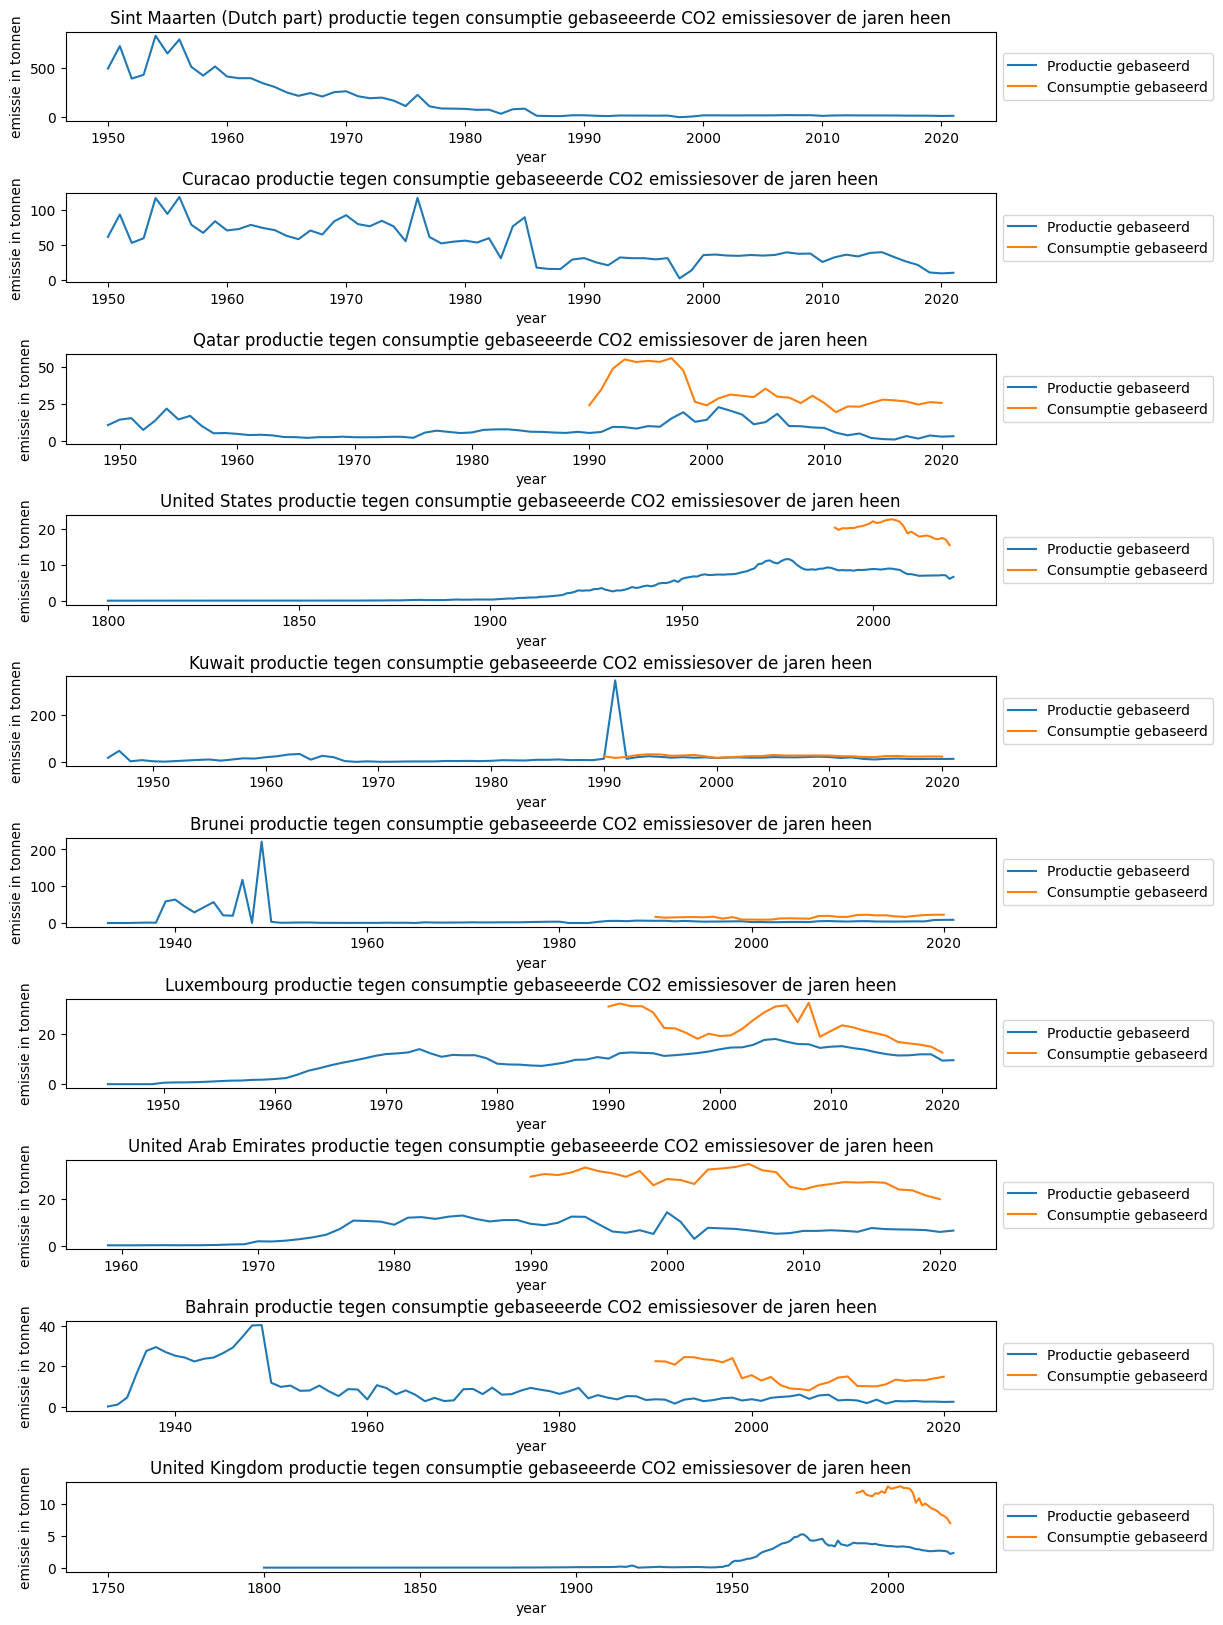

In [38]:
#Lineplot per land olie production bases tegen consumption based, top 10 emissie landen
fig, ax = plt.subplots(10)
fig.set_size_inches(12,20)
plt.subplots_adjust( hspace=.8)
i = 0
for country in country_group_cons_prod_sum.index:
  temp = df_co2_small[df_co2_small['country'] == country]
  x = temp['year']
  y1 = temp['oil_co2_per_capita']
  y2 = temp['consumption_co2_per_capita']
  ax[i].set_xlabel('year')
  ax[i].set_ylabel('emissie in tonnen')
  ax[i].set_title(country + ' productie tegen consumptie gebaseeerde CO2 emissiesover de jaren heen')
  ax[i].plot(x, y1, label = 'Productie gebaseerd')
  ax[i].plot(x, y2, label = 'Consumptie gebaseerd')
  ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
  i = i+1

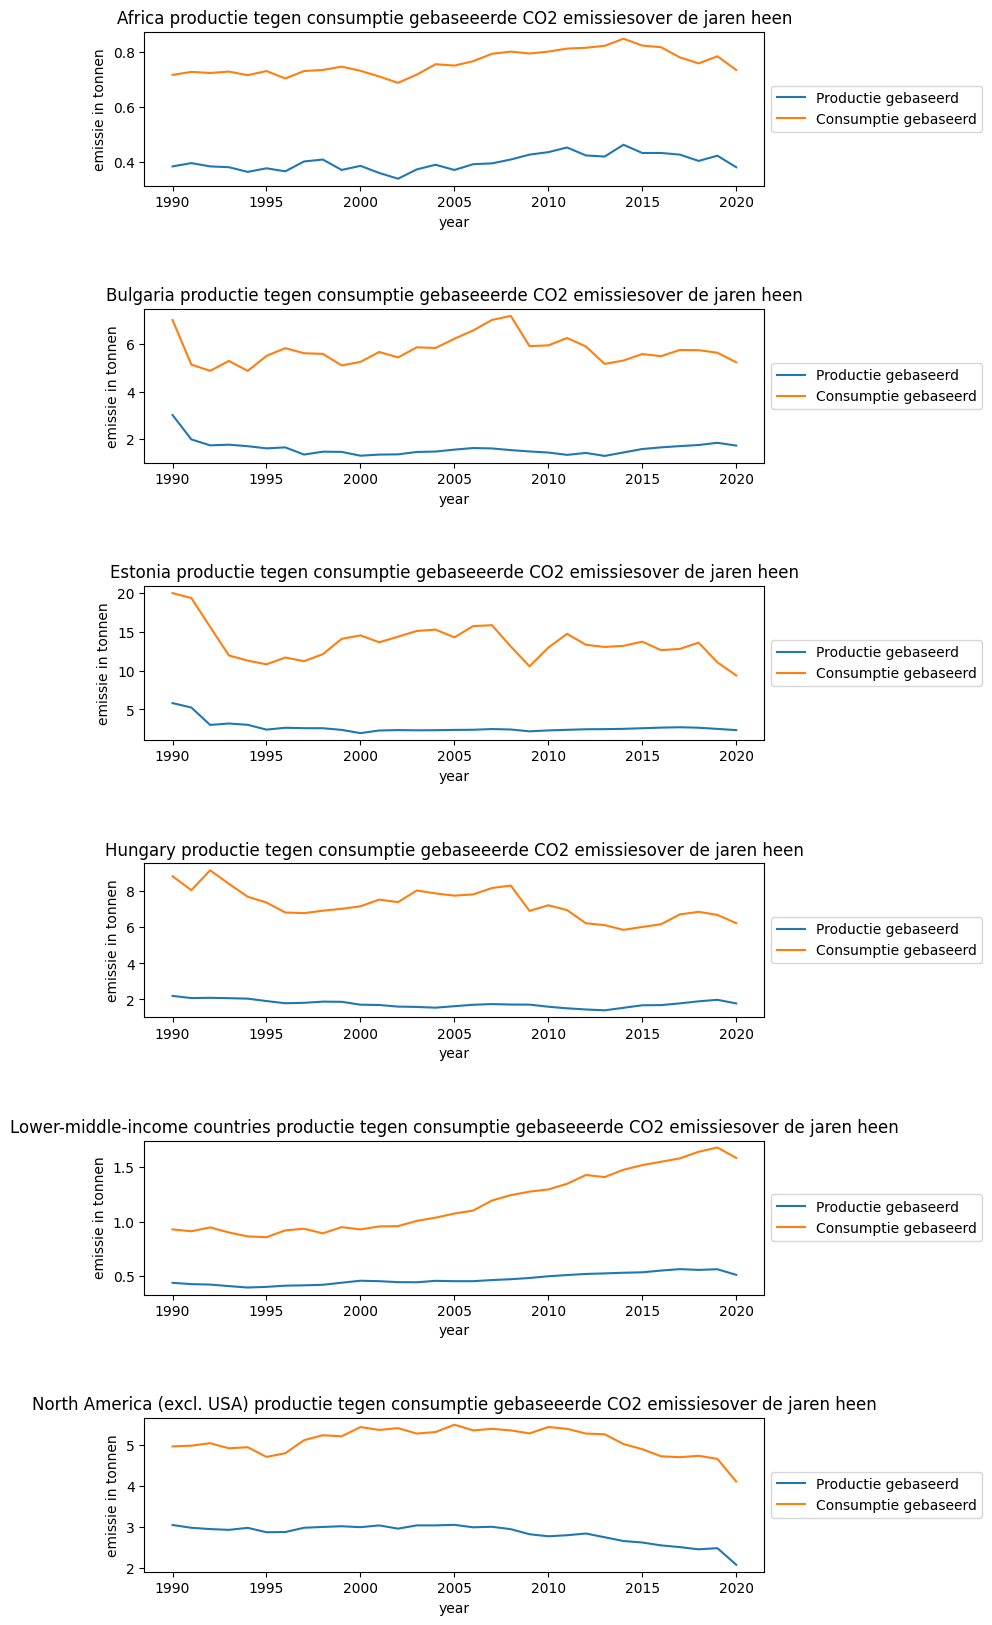

In [39]:
#Lineplot per land olie production bases tegen consumption based
temp = df_co2_small[~df_co2_small['oil_co2_per_capita'].isna()]
temp = temp[~temp['consumption_co2_per_capita'].isna()]
fig, ax = plt.subplots(6)
fig.set_size_inches(8,20)
plt.subplots_adjust( hspace=.8)
i=0
z = 0
for country in temp['country'].unique():
  temp2 = temp[temp['country'] == country]
  if z%18==0 and len(temp2['year']) > 20 and i < 6:
    x = temp2['year']
    y1 = temp2['oil_co2_per_capita']
    y2 = temp2['consumption_co2_per_capita']
    ax[i].set_xlabel('year')
    ax[i].set_ylabel('emissie in tonnen')
    ax[i].set_title(country + ' productie tegen consumptie gebaseeerde CO2 emissiesover de jaren heen')
    ax[i].plot(x, y1, label = 'Productie gebaseerd')
    ax[i].plot(x, y2, label = 'Consumptie gebaseerd')
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    i=i+1
  z=z+1

In [40]:
#Waarvoor wordt deze olie nu gebruikt
final_table_columns = ['country','year','population','gdp','oil_cons_change_pct','oil_cons_change_twh','oil_consumption','oil_elec_per_capita','oil_electricity','oil_energy_per_capita','oil_prod_change_pct','oil_prod_change_twh','oil_prod_per_capita','oil_production','oil_share_elec','oil_share_energy']
df_energy = df_energy[df_energy.columns.intersection(final_table_columns)]

In [41]:
#Combineer co2 dataset met energy dataset
df_co2_and_energy = pd.merge(df_co2_small.loc[:,['country', 'year','co2_per_capita']],df_energy, on = ['country','year'])

#df_energy['oil_elec_per_capita'] #Elektriciteitsopwekking per hoofd van de bevolking uit olie, gemeten in kilowattuur
temp = df_co2_and_energy[~df_co2_and_energy['oil_elec_per_capita'].isna()]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_elec_per_capita'])
display(r)

temp = df_co2_and_energy[~df_co2_and_energy['oil_energy_per_capita'].isna()]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_energy_per_capita'])
display(r)

temp = df_co2_and_energy[~df_co2_and_energy['oil_prod_per_capita'].isna()]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_prod_per_capita'])
display(r)


array([[1.        , 0.24487047],
       [0.24487047, 1.        ]])

array([[1.        , 0.48011648],
       [0.48011648, 1.        ]])

array([[1.        , 0.45165577],
       [0.45165577, 1.        ]])

In [42]:
#voor wel/niet top 10 landen
temp = df_co2_and_energy[~df_co2_and_energy['oil_energy_per_capita'].isna()]
temp = temp[~temp['country'].isin(country_group_cons_prod_sum.index)]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_energy_per_capita'])
display(r)

temp = df_co2_and_energy[~df_co2_and_energy['oil_prod_per_capita'].isna()]
temp = temp[~temp['country'].isin(country_group_cons_prod_sum.index)]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_prod_per_capita'])
display(r)

array([[1.        , 0.57322767],
       [0.57322767, 1.        ]])

array([[1.        , 0.26769274],
       [0.26769274, 1.        ]])

In [ ]:
temp['oil_elec_per_capita']

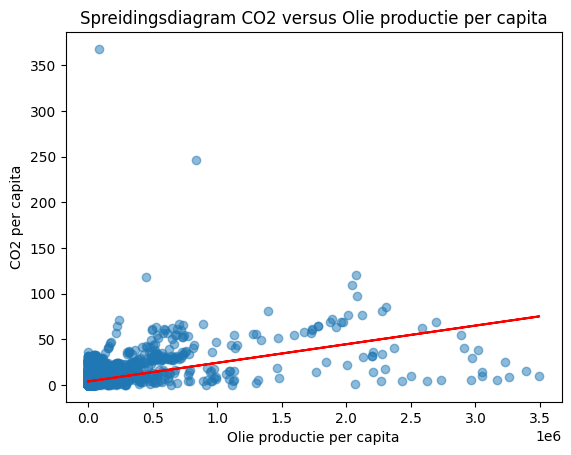

In [43]:
temp = df_co2_and_energy[~df_co2_and_energy['oil_prod_per_capita'].isna()]

#we kijken naar de olie productie en co2 emissie per capita
from scipy import stats

fig, ax = plt.subplots()
x = temp['oil_prod_per_capita']
y = temp['co2_per_capita']
ax.set_xlabel('Olie productie per capita')
ax.set_ylabel("CO2 per capita")
ax.set_title('Spreidingsdiagram CO2 versus Olie productie per capita')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

#TRANSPORT

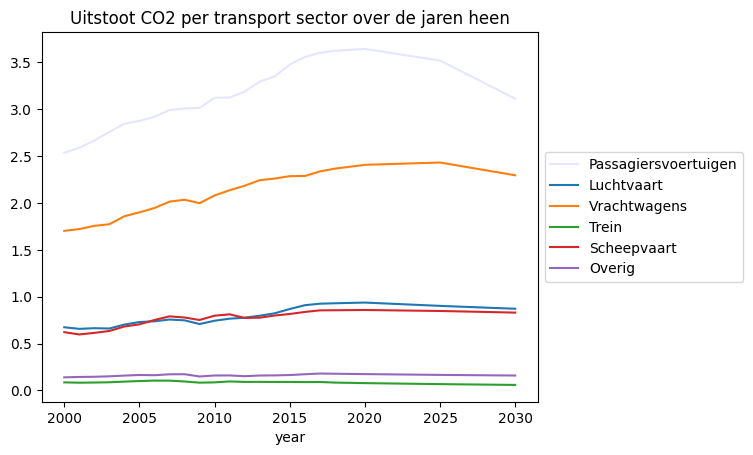

In [44]:
#Lineplot per jaar, 
fig, ax = plt.subplots()

x = df_transport['Year']
y1 = df_transport[' Passenger road vehicles']
y2 = df_transport[' Aviation']
y3 = df_transport[' Road freight vehicles']
y4 = df_transport[' Rail']
y5 = df_transport[' Shipping']
y6 = df_transport[' Other']
ax.set_xlabel('year')
ax.set_title('Uitstoot CO2 per transport sector over de jaren heen')
ax.plot(x, y1, label = 'Passagiersvoertuigen',color='blue',alpha=0.1)
ax.plot(x, y2, label = 'Luchtvaart')
ax.plot(x, y3, label = 'Vrachtwagens')
ax.plot(x, y4, label = 'Trein')
ax.plot(x, y5, label = 'Scheepvaart')
ax.plot(x, y6, label = 'Overig')
# ax[i].plot(x, y4,c='r',label='CO2 uitstoot')
# ax[i].fill_between(x, y4,color='red',alpha=0.1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [45]:
#We gaan de totale CO2 uitstoot per jaar berekenen en deze tegenover de transport sessie zetten:
year_group_sum = df_co2_small.groupby(by='year')

In [46]:
year_group_sum = year_group_sum['co2'].sum()

In [ ]:
year_group_sum.to_frame()

In [48]:
year_group_sum = year_group_sum.reset_index()

In [ ]:
year_group_sum

In [ ]:
df_transport.rename(columns={'Year' : 'year'},inplace=True)
year_group_sum_transport = pd.merge(year_group_sum,df_transport, on = ['year'])
year_group_sum_transport

In [51]:
# co2 in million tonnes - 10^6
# anderen in gt =10^9
# van million tonn -> gt  /1000
year_group_sum_transport['co2_in_gt'] = year_group_sum_transport['co2']/1000

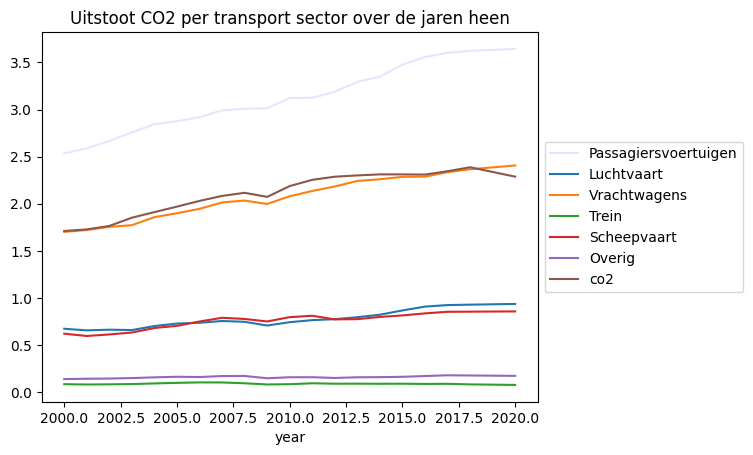

In [52]:
#Lineplot per jaar, 
fig, ax = plt.subplots()

x = year_group_sum_transport['year']
y1 = year_group_sum_transport[' Passenger road vehicles']
y2 = year_group_sum_transport[' Aviation']
y3 = year_group_sum_transport[' Road freight vehicles']
y4 = year_group_sum_transport[' Rail']
y5 = year_group_sum_transport[' Shipping']
y6 = year_group_sum_transport[' Other']
y7 = year_group_sum_transport['co2_in_gt']/100
ax.set_xlabel('year')
ax.set_title('Uitstoot CO2 per transport sector over de jaren heen')
ax.plot(x, y1, label = 'Passagiersvoertuigen',color='blue',alpha=0.1)
ax.plot(x, y2, label = 'Luchtvaart')
ax.plot(x, y3, label = 'Vrachtwagens')
ax.plot(x, y4, label = 'Trein')
ax.plot(x, y5, label = 'Scheepvaart')
ax.plot(x, y6, label = 'Overig')
ax.plot(x, y7, label = 'co2')
# ax[i].plot(x, y4,c='r',label='CO2 uitstoot')
# ax[i].fill_between(x, y4,color='red',alpha=0.1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
year_group_sum_transport

#ENERGIE en FLARING

In [53]:
#olie wordt voor een groot deel gebruikt voor energie
#flaring: CO2 dat vrijkomt bij het verbranden van de bij aardgaswinning, aardolieproductie en olieraffinage vrijkomende gassen
#laten we starten met het correlatiecoefficent

# Correlatie coefficient berekenen, per capita
#NaN waarde verwijderen om mee te rekenen
y = df_co2_small[~df_co2_small['flaring_co2_per_capita'].isna()]
print('Flaring')
r = np.corrcoef(y['co2_per_capita'], y['flaring_co2_per_capita'])
display(r)


Flaring


array([[1.        , 0.18162741],
       [0.18162741, 1.        ]])

In [54]:
#En nu voor de top 10 landen
y_flaring_top10 = df_co2_small[~df_co2_small['flaring_co2_per_capita'].isna()]
y_flaring_top10 = y_flaring_top10[y_flaring_top10['flaring_co2_per_capita'] > 0]
y_flaring_top10 = y_flaring_top10[y_flaring_top10['country'].isin(country_group_cons_prod_sum.index)]
print('Flaring')
r = np.corrcoef(y['co2_per_capita'], y['flaring_co2_per_capita'])
display(r)

Flaring


array([[1.        , 0.18162741],
       [0.18162741, 1.        ]])

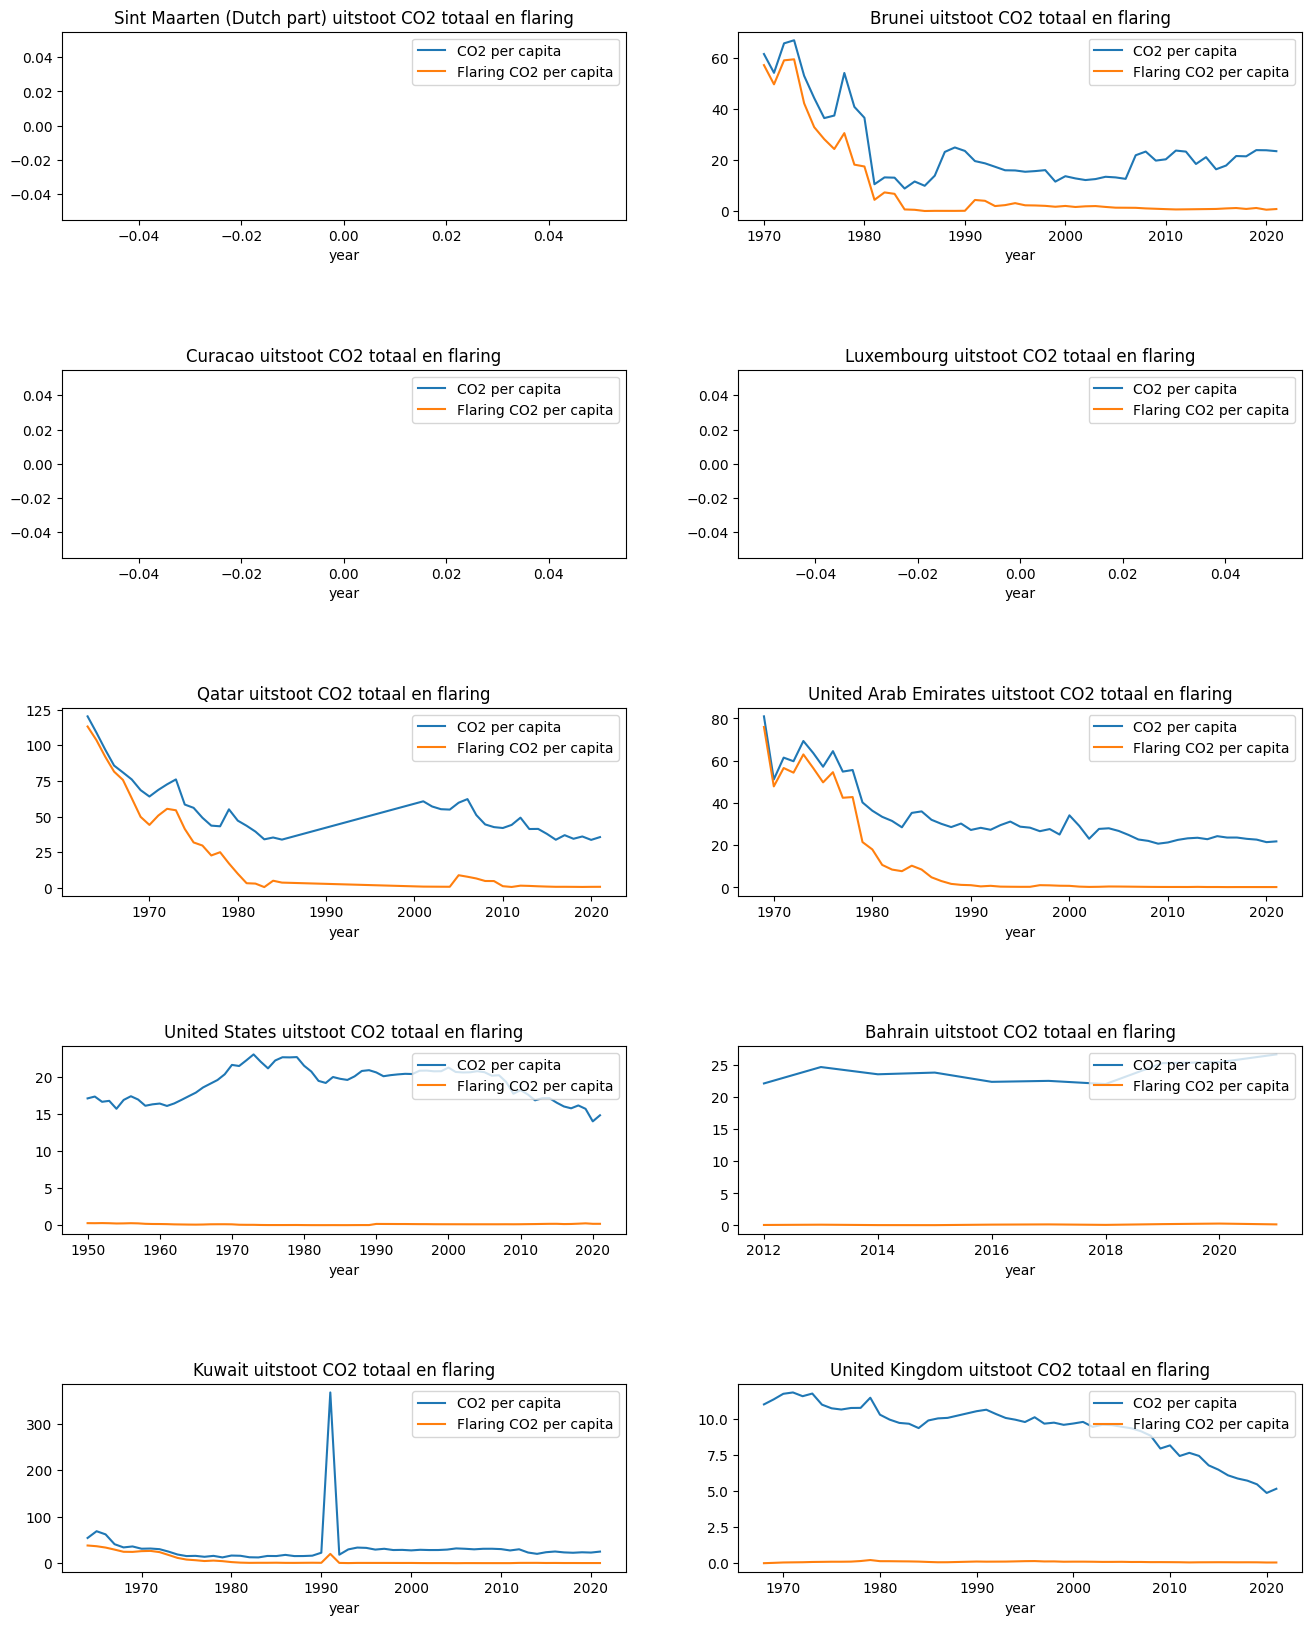

In [55]:
#Lineplot per jaar, 
fig, ax = plt.subplots(5,2)
fig.set_size_inches(16,20)
plt.subplots_adjust( hspace=.8)
i = 0
z = 0
for country in country_group_cons_prod_sum.index:
  temp = y_flaring_top10[y_flaring_top10['country'] == country]
  x = temp['year']
  y1 = temp['co2_per_capita']
  y2 = temp['flaring_co2_per_capita']
  ax[i,z].set_xlabel('year')
  ax[i,z].set_title(country + ' uitstoot CO2 totaal en flaring')
  ax[i,z].plot(x, y1, label = 'CO2 per capita')
  ax[i,z].plot(x, y2, label = 'Flaring CO2 per capita')
  ax[i,z].legend(loc='upper right')
  i = i+1
  if i%5==0:
    z = z+1
    i = 0

In [ ]:
df_sint_maarten = df_co2_small[df_co2_small['country'] == 'Sint Maarten (Dutch part)']
df_sint_maarten.loc[:,['year','co2_per_capita','flaring_co2_per_capita','flaring_co2']]

In [ ]:
df_us = df_co2_small[df_co2_small['country'] == 'United States']
df_us.loc[:,['year','co2_per_capita','flaring_co2_per_capita','flaring_co2']]

In [58]:
df_brunei = df_co2_small[df_co2_small['country'] == 'Brunei']
c = df_brunei[~df_brunei['flaring_co2_per_capita'].isna()]
print('Flaring')
r = np.corrcoef(c['co2_per_capita'], c['flaring_co2_per_capita'])
display(r)

Flaring


array([[1.        , 0.33097684],
       [0.33097684, 1.        ]])

In [59]:
df_unaer = df_co2_small[df_co2_small['country'] == 'United Arab Emirates']
c = df_unaer[~df_unaer['flaring_co2_per_capita'].isna()]
print('Flaring')
r = np.corrcoef(c['co2_per_capita'], c['flaring_co2_per_capita'])
display(r)

Flaring


array([[1.       , 0.8604529],
       [0.8604529, 1.       ]])

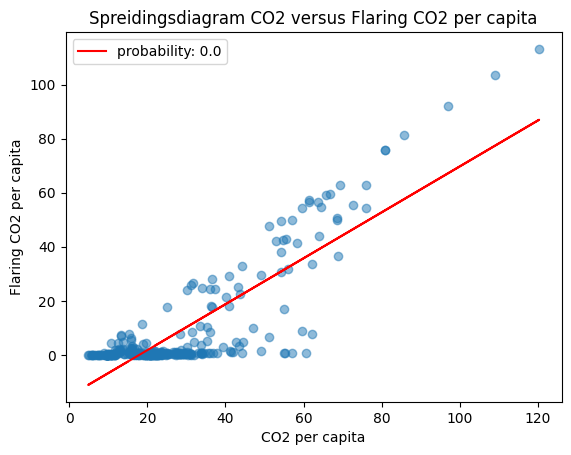

In [73]:
#we kijken naar de scatterplots
from scipy import stats

#Scatter chart + lineaire regressielijn
#outliers eruit
temp = y_flaring_top10[y_flaring_top10['co2_per_capita'] < 200]
fig, ax = plt.subplots()
x = temp['co2_per_capita']
y1 = temp['flaring_co2_per_capita']
ax.set_xlabel('CO2 per capita')
ax.set_ylabel("Flaring CO2 per capita")
ax.set_title('Spreidingsdiagram CO2 versus Flaring CO2 per capita')
plt.scatter(x, y1, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y1)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# plt.plot(x, mymodel, c='r')
plt.plot(x, mymodel, c='r',label = 'probability: ' + str(round(p,8)))
plt.legend()

In [61]:
#Combineer co2 dataset met energy dataset - nog een keer - maar dan met de top 10 landen
# df_co2_and_energy = pd.merge(df_co2_small.loc[:,['country', 'year','co2_per_capita']],df_energy, on = ['country','year'])

#df_energy['oil_elec_per_capita'] #Elektriciteitsopwekking per hoofd van de bevolking uit olie, gemeten in kilowattuur
temp = df_co2_and_energy[~df_co2_and_energy['oil_elec_per_capita'].isna()]
temp = temp[temp['country'].isin(country_group_cons_prod_sum.index)]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_elec_per_capita'])
display(r)

temp = df_co2_and_energy[~df_co2_and_energy['oil_energy_per_capita'].isna()]
temp = temp[temp['country'].isin(country_group_cons_prod_sum.index)]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_energy_per_capita'])
display(r)

temp = df_co2_and_energy[~df_co2_and_energy['oil_prod_per_capita'].isna()]
temp = temp[temp['country'].isin(country_group_cons_prod_sum.index)]
r = np.corrcoef(temp['co2_per_capita'], temp['oil_prod_per_capita'])
display(r)

array([[ 1.        , -0.18728877],
       [-0.18728877,  1.        ]])

array([[1.        , 0.02960975],
       [0.02960975, 1.        ]])

array([[1.        , 0.28614443],
       [0.28614443, 1.        ]])

In [62]:
# en nu energie
# Correlatie coefficient berekenen, per capita
#NaN waarde verwijderen om mee te rekenen
y = df_co2_small[~df_co2_small['energy_per_capita'].isna()]
print('Energy per capita')
r = np.corrcoef(y['co2_per_capita'], y['energy_per_capita'])
display(r)

Energy per capita


array([[1.        , 0.73532212],
       [0.73532212, 1.        ]])

In [63]:
# en nu energie 10 top landen en dan vervolgens alle landen, behalve de top10
# Correlatie coefficient berekenen, per capita
#NaN waarde verwijderen om mee te rekenen
y = df_co2_small[~df_co2_small['energy_per_capita'].isna()]
y= y[~y['country'].isin(country_group_cons_prod_sum.index)]
print('Energy per capita')
r = np.corrcoef(y['co2_per_capita'], y['energy_per_capita'])
display(r)

Energy per capita


array([[1.        , 0.85110592],
       [0.85110592, 1.        ]])

In [ ]:
#Hypothese: een land waar men veel energie uit olie haalt is de grootste voorspeller voor een hoge CO2 emissie.
#Maar correlatiecoefficient met 'olie energie per capita' is erg klein.

In [64]:
temp = df_co2_and_energy[~df_co2_and_energy['oil_energy_per_capita'].isna()]
temp = temp[~temp['country'].isin(country_group_cons_prod_sum.index)] #wel/niet top10
r = np.corrcoef(temp['co2_per_capita'], temp['oil_energy_per_capita'])
display(r)

array([[1.        , 0.57322767],
       [0.57322767, 1.        ]])

In [65]:
# en nu primair energieverbruik uit olie
# Correlatie coefficient berekenen, per capita
#NaN waarde verwijderen om mee te rekenen
y = df_co2_and_energy[~df_co2_and_energy['oil_consumption'].isna()]
print('oil_consumption')
r = np.corrcoef(y['co2_per_capita'], y['oil_consumption'])
display(r)

oil_consumption


array([[1.        , 0.00549398],
       [0.00549398, 1.        ]])

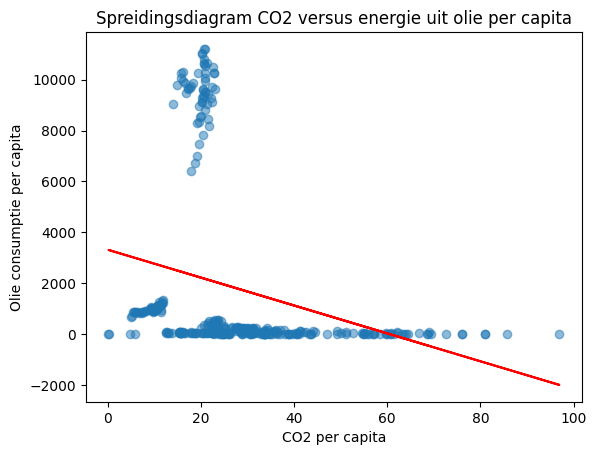

In [66]:
#we kijken naar de scatterplots
from scipy import stats

#Scatter chart gini - gdp + lineaire regressielijn
#outliers eruit
temp = df_co2_and_energy[~df_co2_and_energy['oil_consumption'].isna()]
temp = temp[temp['co2_per_capita'] < 200] #outliers eruit
temp = temp[temp['oil_consumption'] > 0]
temp = temp[temp['country'].isin(country_group_cons_prod_sum.index)] #voor top 10 landen
fig, ax = plt.subplots()
x = temp['co2_per_capita']
y = temp['oil_consumption']
ax.set_xlabel('CO2 per capita')
ax.set_ylabel("Olie consumptie per capita")
ax.set_title('Spreidingsdiagram CO2 versus energie uit olie per capita')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')

In [67]:
#Laten we de 'energy_per_capita' nu eens bekijken met de 'oil_co2_per_capita'
#Vormen deze samen een grote voorspeller?
y = df_co2_small[~df_co2_small['oil_co2_per_capita'].isna()]
y = y[~y['energy_per_capita'].isna()]
print('energy versus oil')
r = np.corrcoef(y['energy_per_capita'], y['oil_co2_per_capita'])
display(r)

energy versus oil


array([[1.        , 0.45458198],
       [0.45458198, 1.        ]])

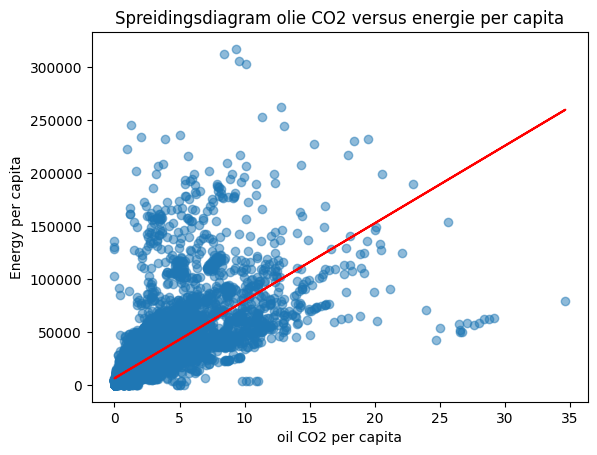

In [68]:
#Scatter chart
#outliers eruit
temp = df_co2_small[~df_co2_small['oil_co2_per_capita'].isna()]
temp = temp[~temp['energy_per_capita'].isna()]
temp = temp[temp['oil_co2_per_capita']<200]
# temp = temp[temp['country'].isin(country_group_cons_prod_sum.index)] #voor top 10 landen
fig, ax = plt.subplots()
x = temp['oil_co2_per_capita']
y = temp['energy_per_capita']
ax.set_xlabel('oil CO2 per capita')
ax.set_ylabel("Energy per capita")
ax.set_title('Spreidingsdiagram olie CO2 versus energie per capita')
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

plt.plot(x, mymodel, c='r')